In [144]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2
from magpie_data import OpticalFrames
import matplotlib.pyplot as plt
import matplotlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Set location of 12 frame images
These should be images previously shifted with shiftr so they overlap. The filenames are standardised by shiftr so we don't need to know them. 
You should find the start time of the diagnostic and the interframe time in the lab book or scope traces. Currently only constant interframe times are supported, but you can manually edit of.frame_times if you're that way inclined.

You should find the scale and rotation angle using Photoshop and the Ruler tool on one of the background images. Flip_lr is useful if you want to compare to interferometry, as the 12-frame image is usually left/right flipped compared to the green interferogram.

This produces an object, of, which contains all the data and methods for operating on that data.

In [139]:
%cd "C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0919_17 C reconnection Faraday\s0919_17 12 frame"
start_time=200
interframe_time=20
of=OpticalFrames(start=start_time,IF=interframe_time,flip_lr=False,rot_angle=-97.4,scale=35,)

C:\Users\jdhare\Google Drive\MAGPIE\data\2017\s0919_17 C reconnection Faraday\s0919_17 12 frame


#### Crop images
Finding the centre of the images is also best done in Photoshop using the ruler tool. 
The origin is in (x,y) pixel coordinates.
Extent is the region to be cropped in the form [bottom,top,left,right], in mm. Eg. [-5,10,0,4] selects a region from -5 to 10 mm (measured from the set origin) in y, and 0 to 4 mm in x.

In [140]:
of.set_origins((647,620), extent=[-12,12,-8,8])

#### Plot the frames
Here you can plot selected frames. Write a list of frames in frames_to_plot [a shortcut for all frames would be range(0,13)], and choose the colourmap limits in clim.

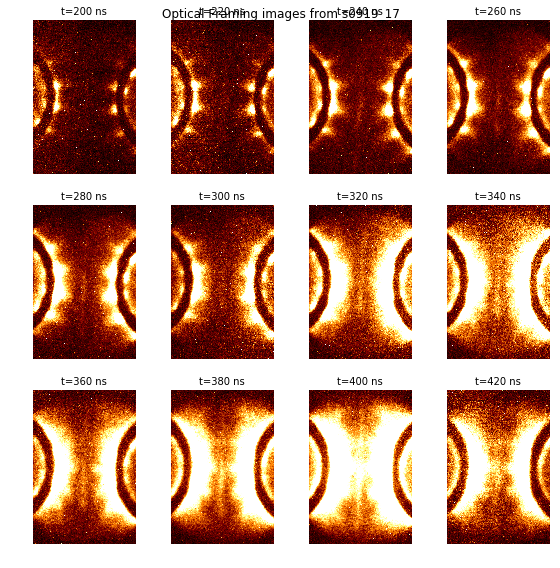

In [148]:
frames_to_plot=range(1,13)

clim=[0,4000]

yframes=round(len(frames_to_plot)/4)
fig, ax=plt.subplots(yframes,4, figsize=(8,8))
ax=ax.flatten()
for fin,f in enumerate(frames_to_plot):
    fn=f-1 #shift to 0 indexed arrays
    a=ax[fin]
    a.imshow(of.s[fn].data_c, cmap='afmhot', clim=clim)
    a.axis('off')
    a.set_title('t='+str(of.frame_times[fn])+' ns', fontsize=10)
fig.suptitle("Optical Framing images from "+of.shot, fontsize=12)
fig.tight_layout(w_pad=0, h_pad=0)

#### Plot the frames with individually adjusted scales
The sensitivity of the 12 frame varies between frames. It is difficult to correct for this using the background images, which suggests that the sensitivity changes with the exposure. Therefore, it is often necessary to adjust the levels by hand in order to avoid the perception of changing brightness.

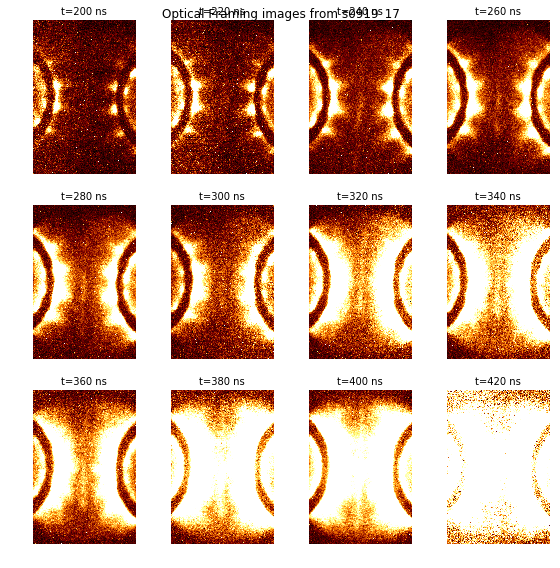

In [195]:
frames_to_plot=range(1,13)
default_clim=[0,3000]
clims=[default_clim for i in frames_to_plot]

clims[9]=[0,2000]
clims[11]=[0,1000]

yframes=round(len(frames_to_plot)/4)
fig, ax=plt.subplots(yframes,4, figsize=(8,8))
ax=ax.flatten()
for fin,f in enumerate(frames_to_plot):
    fn=f-1 #shift to 0 indexed arrays
    a=ax[fin]
    a.imshow(of.s[fn].data_c, cmap='afmhot', clim=clims[fn])
    a.axis('off')
    a.set_title('t='+str(of.frame_times[fn])+' ns', fontsize=10)
fig.suptitle("Optical Framing images from "+of.shot, fontsize=12)
fig.tight_layout(w_pad=0, h_pad=0)

#### Plot with a logarithmic scale
Often a log scale can help bring out features in the images.

<IPython.core.display.Javascript object>


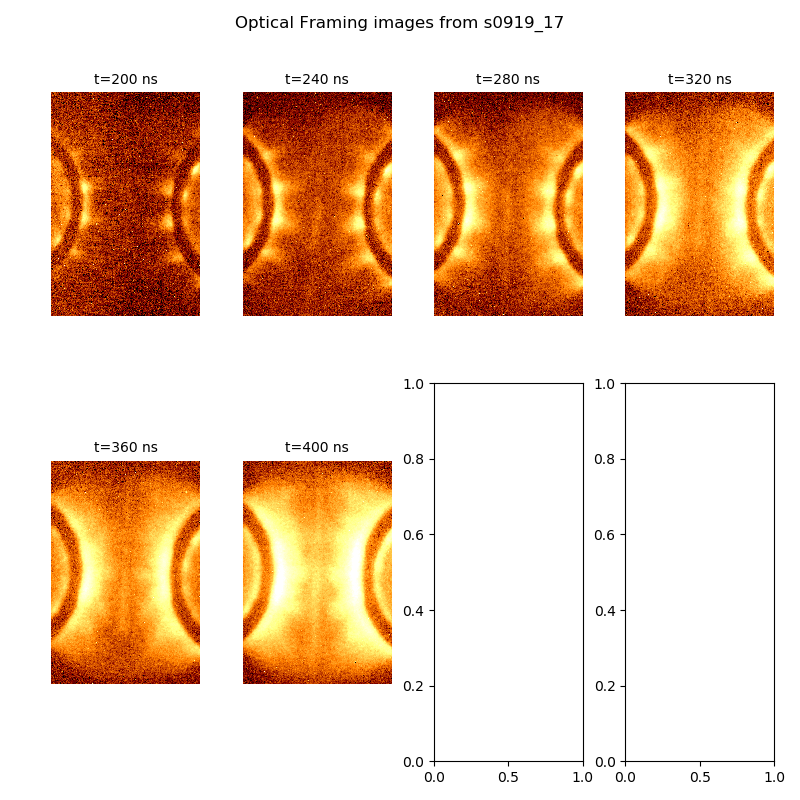

In [136]:
frames_to_plot=[1,3,5,7,9,11]
of.logarithm(lv_min=1, lv_max=10)

clim=[0.4,1]

yframes=round(len(frames_to_plot)/4)
fig, ax=plt.subplots(yframes,4, figsize=(8,8))
ax=ax.flatten()
for fin,f in enumerate(frames_to_plot):
    fn=f-1 #shift to 0 indexed arrays
    a=ax[fin]
    a.imshow(of.s[fn].data_log, cmap='afmhot', clim=clim)
    a.axis('off')
    a.set_title('t='+str(of.frame_times[fn])+' ns', fontsize=10)
fig.suptitle("Optical Framing images from "+of.shot, fontsize=12)
fig.tight_layout(w_pad=0, h_pad=0)

#### Save a gif
You can either use the logarithmic or linear scale to save the gif by setting log to True or False. Duration is the time each frame is displayed in ms. Width is the width of the gif in inches - 6 works well.

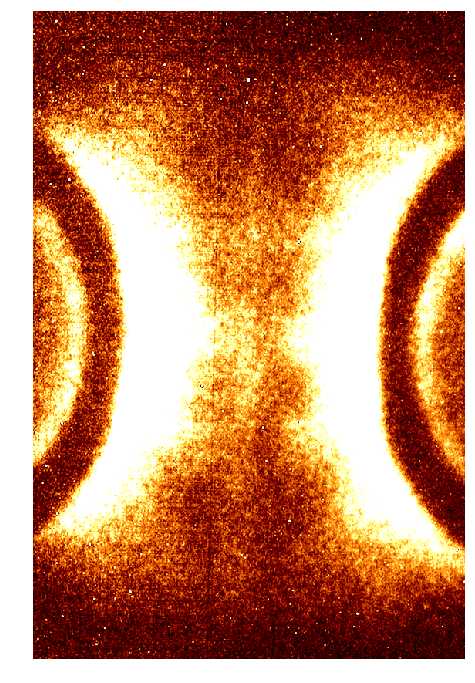

In [147]:
%matplotlib inline
of.save_gif(of.shot, clim=clim, width=6, duration=0.2, log=False)

#### Gif with variable colour bars per frame

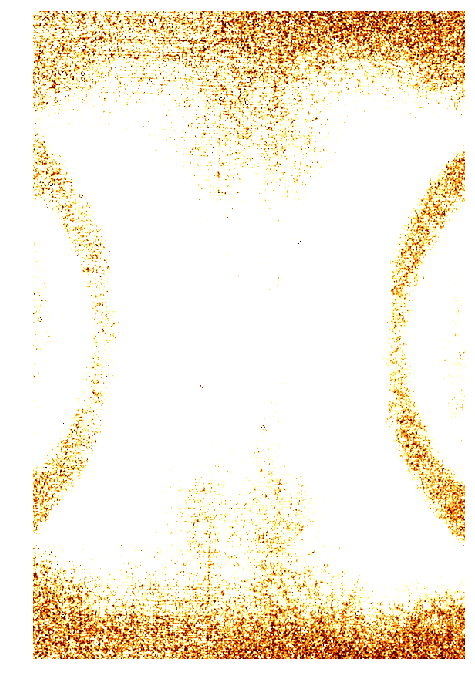

In [196]:
%matplotlib inline
import images2gif as ig

log=False
w=6
duration=0.2

frame=of.s[0].data_c
h=w/frame.shape[1]*frame.shape[0]
fig, ax=plt.subplots(figsize=(w,h))
hot_im=[]
for i, im in enumerate(of.s):
    if log is True:
        data=im.data_log
    else:
        data=im.data_c
    ax.imshow(data, cmap='afmhot', clim=clims[i])
    plt.axis('off')
    fig.subplots_adjust(left=0, bottom=0, right=1.0, top=1.0,
        wspace=0, hspace=0)
    fig.canvas.draw()
    w,h=fig.canvas.get_width_height()
    buf=np.fromstring(fig.canvas.tostring_rgb(), dtype=np.uint8)
    buf.shape=(h,w,3)
    hot_im.append(buf)
ig.writeGif(of.shot+'12 frame test.gif',hot_im, duration=duration)